<a href="https://colab.research.google.com/github/kangmg/personal_study/blob/main/material_project_new_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

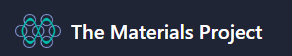

<font color=skyblue size=5>Material Project New API Tutorials</font>


<font color=skyblue size=6>노트북 목차</font>

- API Key 정의

<font color=skyblue size=6>노트북에서 다루는 내용</font>

- 원하는 물질 필터링하기
- 대량의 구조 데이터 다운받기
- 저장한 데이터 lmdb/ase db로 저장하기

<font color=pink size=5>API Key 불러오기</font>

- 방법 1. Colab 노트북 보안 비밀 추가 ( 코랩에서만 해당 )
```python
from google.colab import userdata
MP_API_KEY = userdata.get('MP_API_KEY')
```
- 방법 2. 환경 변수로 저장
```python
import os
MP_API_KEY = os.environ.get('MP_API_KEY')
```
- 방법 3. API 키 선언 (추천 X, 해당 튜토리얼에서 사용)
```python
MP_API_KEY = '<your api key here>'
```

In [ ]:
#@title 필요 패키지 설치

# 필수 O
%pip install -q mp-api # MP API client package
# https://github.com/materialsproject/api

# 필수 X
%pip install -q py3Dmol # for molecular visualization
%pip install -q ase # ase db 변환 등


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.6/212.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.0 MB/s eta 0:00:00
   ━━━━━━

In [ ]:
#@title API KEY 입력
#@markdown [Material Project](https://next-gen.materialsproject.org/)에 가입 후 이 [링크](https://next-gen.materialsproject.org/dashboard)에서 발급/확인 가능

MP_API_KEY = '' #@param {type:"string"}

In [ ]:
## tmp

from google.colab import userdata
MP_API_KEY = userdata.get('MP_API_KEY')

## tmp

In [ ]:
#@title Field 목록  | 데이터에 포함할 값들

AVAILABLE_FIELDS = {
    'builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous',
    'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons',
    'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom',
    'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap',
    'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down',
    'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units',
    'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus', 'shear_modulus', 'universal_anisotropy',
    'homogeneous_poisson', 'e_total', 'e_ionic', 'e_electronic', 'n', 'e_ij_max', 'weighted_surface_energy_EV_PER_ANG2', 'weighted_surface_energy',
    'weighted_work_function', 'surface_anisotropy', 'shape_factor', 'has_reconstructed', 'possible_species', 'has_props', 'theoretical', 'database_IDs'
}

In [ ]:
#@title 필터링 조건들

#########################################
# for type annotations. ignore this block
class CrystalSystem: pass
class HasProps: pass
class Ordering: pass
#########################################

# default values

band_gap: tuple[float, float] | None = None,
chemsys: str | list[str] | None = None,
crystal_system: CrystalSystem | None = None,
density: tuple[float, float] | None = None,
deprecated: bool | None = None,
e_electronic: tuple[float, float] | None = None,
e_ionic: tuple[float, float] | None = None,
e_total: tuple[float, float] | None = None,
efermi: tuple[float, float] | None = None,
elastic_anisotropy: tuple[float, float] | None = None,
elements: list[str] | None = None,
energy_above_hull: tuple[float, float] | None = None,
equilibrium_reaction_energy: tuple[float, float] | None = None,
exclude_elements: list[str] | None = None,
formation_energy: tuple[float, float] | None = None,
formula: str | list[str] | None = None,
g_reuss: tuple[float, float] | None = None,
g_voigt: tuple[float, float] | None = None,
g_vrh: tuple[float, float] | None = None,
has_props: list[HasProps] | list[str] | None = None,
has_reconstructed: bool | None = None,
is_gap_direct: bool | None = None,
is_metal: bool | None = None,
is_stable: bool | None = None,
k_reuss: tuple[float, float] | None = None,
k_voigt: tuple[float, float] | None = None,
k_vrh: tuple[float, float] | None = None,
magnetic_ordering: Ordering | None = None,
material_ids: str | list[str] | None = None,
n: tuple[float, float] | None = None,
num_elements: tuple[int, int] | None = None,
num_sites: tuple[int, int] | None = None,
num_magnetic_sites: tuple[int, int] | None = None,
num_unique_magnetic_sites: tuple[int, int] | None = None,
piezoelectric_modulus: tuple[float, float] | None = None,
poisson_ratio: tuple[float, float] | None = None,
possible_species: list[str] | None = None,
shape_factor: tuple[float, float] | None = None,
spacegroup_number: int | None = None,
spacegroup_symbol: str | None = None,
surface_energy_anisotropy: tuple[float, float] | None = None,
theoretical: bool | None = None,
total_energy: tuple[float, float] | None = None,
total_magnetization: tuple[float, float] | None = None,
total_magnetization_normalized_formula_units: tuple[float, float] | None = None,
total_magnetization_normalized_vol: tuple[float, float] | None = None,
uncorrected_energy: tuple[float, float] | None = None,
volume: tuple[float, float] | None = None,
weighted_surface_energy: tuple[float, float] | None = None,
weighted_work_function: tuple[float, float] | None = None,
include_gnome: bool = True,

In [ ]:
#@title 필터링 값
#@markdown `['has_props', 'magnetic_ordering', 'crystal_system']`

# crystal type filter
from emmet.core.symmetry import CrystalSystem
CrystalSystem.cubic
CrystalSystem.hex_
CrystalSystem.mono
CrystalSystem.ortho
CrystalSystem.tet
CrystalSystem.tri
CrystalSystem.trig


# magnetism filter
from pymatgen.analysis.magnetism import Ordering
Ordering.AFM
Ordering.FM
Ordering.FiM
Ordering.NM
Ordering.Unknown


# property filter
from emmet.core.summary import HasProps
HasProps.absorption
HasProps.bandstructure
HasProps.charge_density
HasProps.chemenv
HasProps.dielectric
HasProps.dos
HasProps.elasticity
HasProps.electronic_structure
HasProps.eos
HasProps.grain_boundaries
HasProps.insertion_electrodes
HasProps.magnetism
HasProps.materials
HasProps.oxi_states
HasProps.phonon
HasProps.piezoelectric
HasProps.provenance
HasProps.substrates
HasProps.surface_properties
HasProps.thermo
HasProps.xas

None

<font color=skyblue size=5>조건에 맞는 물질의 데이터를 대량으로 불러오는 방법</font>

1.  MP database에서 받아올 값들 정의 (Field 값 참고)
    - e.g.
    -
    ```python
    field=['material_id', 'structure', 'formation_energy_per_atom', 'energy_per_atom', 'warnings', 'symmetry']
    ```
    - formation_energy : 생성 에너지
    - total_energy : 물질의 전체 에너지
    - material_id : MP ID
    - structure : pymatgen.core.structure.Structure

<br>

2. 검색 조건 설정 (필터링 조건 참고)
    - [Materials Explorer](https://next-gen.materialsproject.org/materials)를 통해 필터링된 데이터를 먼저 확인하는 것을 권장
    - e.g.
    -
    ```python
    search_filter = dict(
        chemsys='Si-O-*', # Si와 O가 포함된 ternary system을 검색, * 는 임의 원소
        is_stable=True, # 안정한 구조
        )

    search_filter = dict(
        elements=['Cd', 'Pd'] # N P H 가 *가 됨
        is_metal=True, # 금속 데이터
        )
    
    # 다른 예시
    binary_oxide_filter = dict(chemsys='O-*', elements=['C', 'B', 'N', 'H']) # binary oxide system
    SiO_contain_filter = dict(elements=['Si', 'O']) # Contains Si, O
    SiO_AB2_filter = dict(chemsys='Si-O', formula='AB2') # Silicon oxides | SiO2 or Si2O
    ```

<br>

3. API 호출
    -
    ```python

    ```

In [ ]:
# API KEY 설정
if not MP_API_KEY:
    raise ValueError('MP_API_KEY 를 먼저 설정해주세요.')

In [ ]:
from mp_api.client import MPRester

search_filter = dict(
  chemsys='Si-O-*', # Si와 O가 포함된 ternary system을 검색, * 는 임의 원소
  is_stable=False, # 안정한 구조
  is_metal=False, # 금속이 아님
  )

binary_oxide_filter = dict(chemsys='O-*', elements=['C', 'B', 'N', 'H']) # binary oxide system

field=['material_id', 'structure', 'formation_energy_per_atom', 'energy_per_atom', 'warnings', 'symmetry']

with MPRester(MP_API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        **search_filter,
        fields=field,
    )
    print(f'{len(docs)} data loaded')


Retrieving SummaryDoc documents:   0%|          | 0/487 [00:00<?, ?it/s]

487 data loaded


In [ ]:
with MPRester(MP_API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        crystal_system=CrystalSystem.hex_,
        fields=field,
        num_chunks=10,
        chunk_size=300
    )
    print(f'{len(docs)} data loaded')

Retrieving SummaryDoc documents:   0%|          | 0/3000 [00:00<?, ?it/s]

3000 data loaded


In [ ]:
docs[:-3][0].structure.to_ase_atoms()
docs[:-3][0]

MPDataDoc<SummaryDoc>(
symmetry=SymmetryData(crystal_system=<CrystalSystem.hex_: 'Hexagonal'>, symbol='P6_3/mmc', number=194, point_group='6/mmm', symprec=0.1, angle_tolerance=5.0, version='2.5.0'),
material_id=MPID(mp-862690),
warnings=[],
structure=Structure Summary
Lattice
    abc : 4.04604073 4.046040804636149 13.01703648
 angles : 90.0 90.0 120.0000082576264
 volume : 184.54540076862065
      A : 4.04604073 -2e-08 0.0
      B : -2.02302089 3.50397384 0.0
      C : 0.0 0.0 13.01703648
    pbc : True True True
PeriodicSite: Ac (0.0, 0.0, 0.0) [-0.0, -0.0, 0.0]
PeriodicSite: Ac (-3.5e-07, 2.336, 3.254) [0.3333, 0.6667, 0.25]
PeriodicSite: Ac (0.0, 0.0, 6.509) [-0.0, -0.0, 0.5]
PeriodicSite: Ac (2.023, 1.168, 9.763) [0.6667, 0.3333, 0.75],
energy_per_atom=-68.6374794125,
formation_energy_per_atom=0.0,
fields_not_requested=['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'den

In [ ]:
max_num_data = CHUNK_SIZE

받아서 lmdb나 ase db로 저장하는 방법

In [ ]:
with MPRester(MP_API_KEY) as mpr:

    docs = mpr.materials.summary.search(fields=['structure', 'e_electronic', 'material_id'], is_metal=True)

    # -- Shortcut for a single Materials Project ID:
    #structure = mpr.get_structure_by_material_id("mp-149")

Retrieving SummaryDoc documents:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
docs[0].structure


Structure Summary
Lattice
    abc : 4.027829901198107 4.0278292285621005 4.02782982
 angles : 59.99999514264196 60.00000066686326 59.999994872937556
 volume : 46.205987384126566
      A : 3.48820304 -0.0 2.01391491
      B : 1.16273435 3.28870854 2.01391491
      C : 0.0 -0.0 4.02782982
    pbc : True True True
PeriodicSite: Ac (0.0, 0.0, 0.0) [-0.0, -0.0, 0.0]

In [ ]:
client = MPRester(MP_API_KEY, mute_progress_bars=True)

In [ ]:
structure

Structure Summary
Lattice
    abc : 3.8492784033699095 3.8492794116013456 3.849278
 angles : 60.00001213094421 60.00000346645984 60.00001097545789
 volume : 40.32952684741405
      A : 3.333573 0.0 1.924639
      B : 1.111191 3.142924 1.924639
      C : 0.0 0.0 3.849278
    pbc : True True True
PeriodicSite: Si (3.889, 2.75, 6.736) [0.875, 0.875, 0.875]
PeriodicSite: Si (0.5556, 0.3929, 0.9623) [0.125, 0.125, 0.125]

In [ ]:
data = client.get_structure_by_material_id(docs[0].material_id)

In [ ]:

from mp_api.client import MPRester
from emmet.core.summary import HasProps

with MPRester(MP_API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        has_props = [HasProps.absorption], fields=["material_id"]
    )
    mpids = [doc.material_id for doc in docs]

Retrieving SummaryDoc documents:   0%|          | 0/936 [00:00<?, ?it/s]

 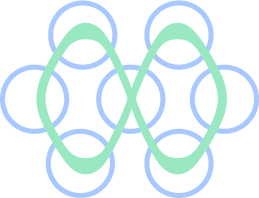

<font size=6 color=skyblue>Documents</font>

- [Official API Docments](https://api.materialsproject.org/redoc)

- [Interactive API Demo](https://api.materialsproject.org/docs#/Materials%20Summary)

- [Forum](https://matsci.org/c/materials-project/8)

- Official MP homepage

    - [using-the-api/getting-started](https://docs.materialsproject.org/downloading-data/using-the-api/getting-started)
    - [how-do-i-download-the-materials-project-database](https://docs.materialsproject.org/downloading-data/how-do-i-download-the-materials-project-database)

<font color=skyblue size=5>5. 비고</font>

- API를 많이 사용할 계획이 있다면, heavy.api.use@materialsproject.org로 미리 알리는 것을 권장함.

- API rate limit : 0.04 s/call ( 25 calls/s )

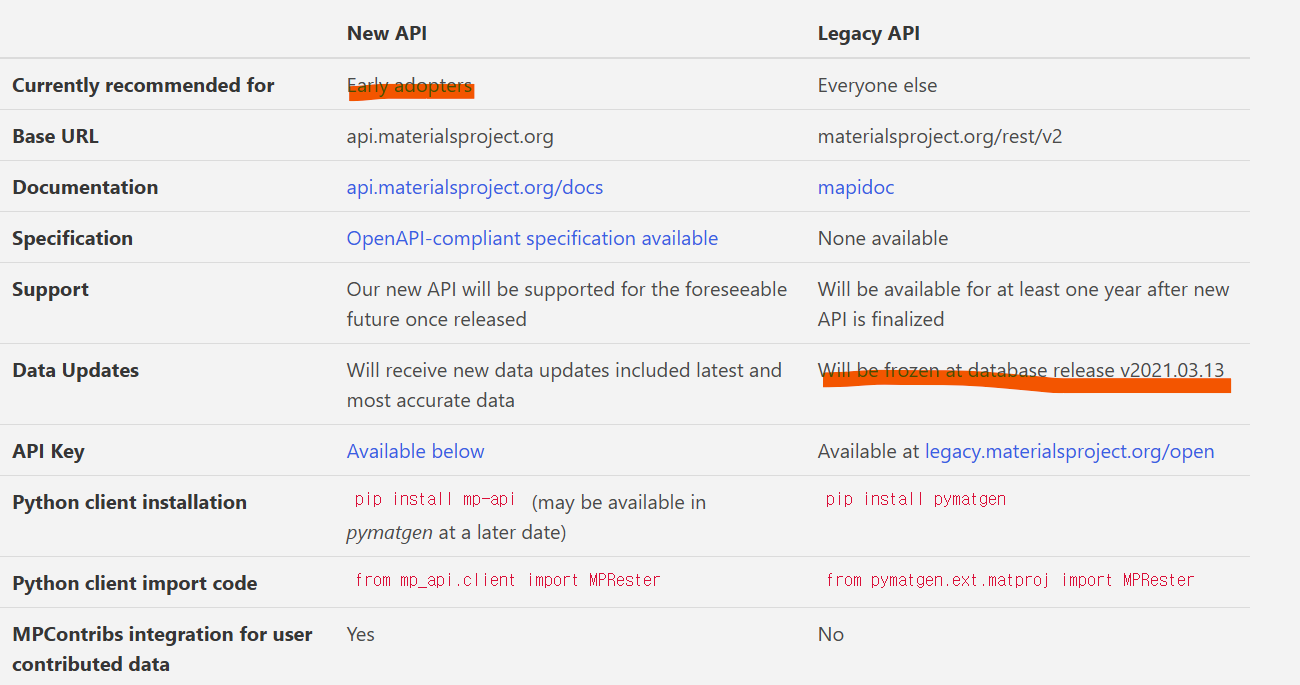

- pymatgen에서 제공하는 MP API는 2021.03.13 이후로 데이터가 업데이트되지 않음
- GNoME이나 OCP22 데이터는 새로운 API로만 다운받을 수 있음